# Detection Methods

This code will consist of multiple methods to attempt to retrieve objects from images.\\
The first two implementations that will be included are:\\
1. SURF
2. Edge Detection

## Load Data

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
IMAGES_FOLDER = "/home/matthijs/robotics_q3/mav/AE4317_2019_datasets/cyberzoo_aggressive_flight/20190121-144646/"
SHOW_CV2_IMG = False
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

images_cyberzoo = load_images_from_folder(IMAGES_FOLDER)

In [2]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [3]:
def show_img(img, img_name="img"):
    if SHOW_CV2_IMG:
        cv2.imshow(img_name, img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [4]:
# Example image
example_img = images_cyberzoo[0]
img_name = "cyberzoo_example"
show_img(example_img)

## Edge Detection

### Handcrafted edge-detection

In [5]:
# convert to gray scale
def rgb_2_gray(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray


In [6]:
img = images_cyberzoo[0]
gray_img = rgb_2_gray(img)
show_img(gray_img)


In [7]:
def edge_detection(filter, image):
    gray_img = rgb_2_gray(image)
    edges_img = np.zeros_like(gray_img)
    N, M = gray_img.shape
    for row in range(3, N-2):
        for col in range(3,M-2):
            local_pixels = gray_img[row-1:row+2, col-1:col+2]
            transformed_pixels = filter * local_pixels
            score = (transformed_pixels.sum() + 4)/8
            edges_img[row,col] = score*3
    return edges_img

def canny_edge_detection(image, th1=100, th2=200):
    edges = cv2.Canny(image, th1, th2)
    return edges

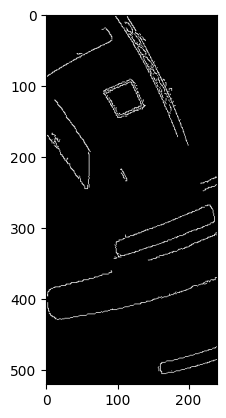

In [8]:
vertical_filter = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
horizontal_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

canny_edges_img = canny_edge_detection(img)
ver_edges_img = edge_detection(vertical_filter,img)
hor_edges_img = edge_detection(horizontal_filter, img)
plt.imshow(canny_edges_img, cmap="gray")
show_img(ver_edges_img)

## SIFT/SURF/ORB

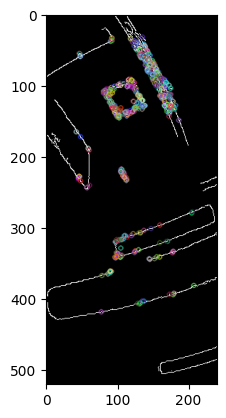

In [9]:
img = canny_edges_img # images_cyberzoo[0]
orb = cv2.ORB_create()
# surf = cv2.xfeatures2d.SURF_create()
keypoints, descriptors = orb.detectAndCompute(img, None)

img = cv2.drawKeypoints(img, keypoints, None)
plt.imshow(img)
if SHOW_CV2_IMG:
    cv2.imshow("img", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Optical Flow

In [10]:

VIDEO_FILE = "/home/matthijs/robotics_q3/mav/cyberzoo.mp4"
cap = cv2.VideoCapture(VIDEO_FILE)
  
# ret = a boolean return value from
# getting the frame, first_frame = the
# first frame in the entire video sequence
ret, first_frame = cap.read()
  
# Converts frame to grayscale because we
# only need the luminance channel for
# detecting edges - less computationally 
# expensive
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
  
# Creates an image filled with zero
# intensities with the same dimensions 
# as the frame
mask = np.zeros_like(first_frame)
  
# Sets image saturation to maximum
mask[..., 1] = 255
  
while(cap.isOpened()):
      
    # ret = a boolean return value from getting
    # the frame, frame = the current frame being
    # projected in the video
    ret, frame = cap.read()
      
    # Opens a new window and displays the input
    # frame
    cv2.imshow("input", frame)
      
    # Converts each frame to grayscale - we previously 
    # only converted the first frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      
    # Calculates dense optical flow by Farneback method
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, 
                                       None,
                                       0.5, 3, 15, 3, 5, 1.2, 0)
      
    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
      
    # Sets image hue according to the optical flow 
    # direction
    mask[..., 0] = angle * 180 / np.pi / 2
      
    # Sets image value according to the optical flow
    # magnitude (normalized)
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
      
    # Converts HSV to RGB (BGR) color representation
    rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
      
    # Opens a new window and displays the output frame
    cv2.imshow("dense optical flow", rgb)
      
    # Updates previous frame
    prev_gray = gray
      
    # Frames are read by intervals of 1 millisecond. The
    # programs breaks out of the while loop when the
    # user presses the 'q' key
    if cv2.waitKey(1000) & 0xFF == ord('q'):
        break
  
# The following frees up resources and
# closes all windows
cap.release()
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/matthijs/.local/lib/python3.10/site-packages/cv2/qt/plugins"
